<a href="https://colab.research.google.com/github/polyscoobydoo/Villozi-gp/blob/main/%D0%9E%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D1%88%D0%BA%D0%BE%D0%BB%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка библиотеки и инициализация модели

In [1]:
!pip install blocksnet ipykernel mapclassify -qq

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [2]:
import geopandas as gpd
import pandas as pd

import os
import warnings
warnings.filterwarnings("ignore") # отключаем все предупреждения

In [3]:
data_path = '/content/data' # в эту папку нужно положить geojson файл с нарезанными кварталми на прошлом занятии

In [4]:
blocks = gpd.read_file(os.path.join(data_path, 'blocks.geojson')) # считываем в переменную наши кварталы

In [5]:
accessibility_matrix =  pd.read_pickle(os.path.join(data_path, 'acc_mx.pickle')) # считываем в переменную наши кварталы

In [6]:
from blocksnet import City

blocks['land_use'] = None

Villozi = City(
blocks=blocks,
acc_mx=accessibility_matrix,
 )

print(Villozi)

CRS : EPSG:32636
Blocks : 505
Service types : 0/66
Buildings : 0
Services : 0



# Подготовка данных по зданиям

## Загрузка зданий с OSM

In [8]:
import osmnx as ox

# Определяем город
city_name = "Виллозское городское поселение"

# Загружаем здания в пределах города
buildings = ox.geometries_from_place(city_name, tags={'building': True})

# Просмотр первых строк данных
buildings

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

ref  \
element_type osmid             
node         9798700285  NaN   
             9798700286  NaN   
             9798700287  NaN   
             9798700288  NaN   
             9801624975  NaN   
...                      ...   
relation     15621461    NaN   
             15621462    NaN   
             15621466    NaN   
             17100951    NaN   
             17772089    NaN   

                                                                  geometry  \
element_type osmid                                                           
node         9798700285                          POINT (30.09326 59.70290)   
             9798700286                          POINT (30.09440 59.70240)   
             9798700287                          POINT (30.09423 59.70256)   
             9798700288                          POINT (30.09405 59.70270)   
             9801624975                          POINT (30.09192 59.70167)   
...                                                                    ...   
relation     15621461    POLYGON ((30.16201 59.79786, 30.16277 59.79808...   
             15621462    POLYGON ((30.16147 59.79764, 30.16159 59.79773...   
             15621466    POLYGON ((30.16218 59.79723, 30.16238 59.79737...   
             17100951    MULTIPOLYGON (((30.24658 59.72022, 30.24666 59...   
             17772089    POLYGON ((30.14867 59.77920, 30.14908 59.77963...   

                        access wheelchair amenity operator operator:wikidata  \
element_type osmid                                                             
node         9798700285    NaN        NaN     NaN      NaN               NaN   
             9798700286    NaN        NaN     NaN      NaN               NaN   
             9798700287    NaN        NaN     NaN      NaN               NaN   
             9798700288    NaN        NaN     NaN      NaN               NaN   
             9801624975    NaN        NaN     NaN      NaN               NaN   
...                        ...        ...     ...      ...               ...   
relation     15621461      NaN        NaN     NaN      NaN               NaN   
             15621462      NaN        NaN     NaN      NaN               NaN   
             15621466      NaN        NaN     NaN      NaN               NaN   
             17100951      NaN        NaN     NaN      NaN               NaN   
             17772089      NaN        NaN     NaN      NaN               NaN   

                        phone source operator:wikipedia  ...  \
element_type osmid                                       ...   
node         9798700285   NaN  maxar                NaN  ...   
             9798700286   NaN  maxar                NaN  ...   
             9798700287   NaN  maxar                NaN  ...   
             9798700288   NaN  maxar                NaN  ...   
             9801624975   NaN  maxar                NaN  ...   
...                       ...    ...                ...  ...   
relation     15621461     NaN    NaN                NaN  ...   
             15621462     NaN    NaN                NaN  ...   
             15621466     NaN    NaN                NaN  ...   
             17100951     NaN    NaN                NaN  ...   
             17772089     NaN    NaN                NaN  ...   

                        service:vehicle:inspection service:vehicle:motor  bin  \
element_type osmid                                                              
node         9798700285                        NaN                   NaN  NaN   
             9798700286                        NaN                   NaN  NaN   
             9798700287                        NaN                   NaN  NaN   
             9798700288                        NaN                   NaN  NaN   
             9801624975                        NaN                   NaN  NaN   
...                                            ...                   ...  ...   
relation     15621461                          NaN                   Na

In [9]:
local_crs = buildings.estimate_utm_crs() # определяем локальную систему координат
local_crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
buildings = buildings.to_crs(local_crs) # переводим здания в локальную систему координат
buildings.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Работа со зданиями

In [11]:
buildings = buildings[buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]
buildings.head()

ref                                           geometry  \
element_type osmid                                                              
way          43585638  NaN  POLYGON ((339887.703 6631994.902, 339866.303 6...   
             50981167  NaN  POLYGON ((340441.911 6629435.364, 340461.287 6...   
             50981168  NaN  POLYGON ((340427.496 6629403.546, 340446.653 6...   
             50981572  NaN  POLYGON ((339807.177 6629786.710, 339788.232 6...   
             50981573  NaN  POLYGON ((339803.744 6629750.597, 339779.330 6...   

                      access wheelchair amenity  \
element_type osmid                                
way          43585638    NaN        NaN     NaN   
             50981167    NaN        NaN     NaN   
             50981168    NaN        NaN     NaN   
             50981572    NaN        NaN     NaN   
             50981573    NaN        NaN     NaN   

                                                  operator operator:wikidata  \
element_type osmid                                                             
way          43585638  Управляющая компания «Далпорт Сити»               NaN   
             50981167                                  NaN               NaN   
             50981168                                  NaN               NaN   
             50981572                                  NaN               NaN   
             50981573                                  NaN               NaN   

                                phone source operator:wikipedia  ...  \
element_type osmid                                               ...   
way          43585638  +7 812 2427800    NaN                NaN  ...   
             50981167             NaN    NaN                NaN  ...   
             50981168             NaN    NaN                NaN  ...   
             50981572             NaN    NaN                NaN  ...   
             50981573             NaN    NaN                NaN  ...   

                      service:vehicle:inspection service:vehicle:motor  bin  \
element_type osmid                                                            
way          43585638                        NaN                   NaN  NaN   
             50981167                        NaN                   NaN  NaN   
             50981168                        NaN                   NaN  NaN   
             50981572                        NaN                   NaN  NaN   
             50981573                        NaN                   NaN  NaN   

                      dispensing service:vehicle:car_parts  \
element_type osmid                                           
way          43585638        NaN                       NaN   
             50981167        NaN                       NaN   
             50981168        NaN                       NaN   
             50981572        NaN                       NaN   
             50981573        NaN                       NaN   

                      service:vehicle:new_car_sales reservation website:menu  \
element_type osmid                                                             
way          43585638                           NaN         NaN          NaN   
             50981167                           NaN         NaN          NaN   
             50981168                           NaN         NaN          NaN   
             50981572                           NaN         NaN          NaN   
             50981573                           NaN         NaN          NaN   

                      ways type  
element_type osmid               
way          43585638  NaN  NaN  
             50981167  NaN  NaN  
             50981168  NaN  NaN  
             50981572  NaN  NaN  
             50981573  NaN  NaN  

[5 rows x 153 columns]

In [12]:
# Сброс индекса, чтобы превратить индексы в обычные столбцы
buildings = buildings.reset_index(drop=True)
# Проверяем результат
buildings.head()

,ref,geometry,access,wheelchair,amenity,operator,operator:wikidata,phone,source,operator:wikipedia,...,service:vehicle:inspection,service:vehicle:motor,bin,dispensing,service:vehicle:car_parts,service:vehicle:new_car_sales,reservation,website:menu,ways,type
0,NaN,"POLYGON ((339887.703 6631994.902, 339866.303 6...",NaN,NaN,NaN,Управляющая компания «Далпорт Сити»,NaN,+7 812 2427800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"POLYGON ((340441.911 6629435.364, 340461.287 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"POLYGON ((340427.496 6629403.546, 340446.653 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"POLYGON ((339807.177 6629786.710, 339788.232 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"POLYGON ((339803.744 6629750.597, 339779.330 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for colums in buildings.columns:
  print(colums)


ref
geometry
access
wheelchair
amenity
operator
operator:wikidata
phone
source
operator:wikipedia
name
building
description
location
military
contact:email
contact:facebook
contact:phone
contact:vk
contact:website
opening_hours
addr:housenumber
addr:street
addr:city
addr:place
bench
shelter_type
abandoned
bunker_type
ruins
material
note
email
service
shop
website
cuisine
outdoor_seating
contact:instagram
contact:telegram
contact:whatsapp
historic
brand
brand:wikidata
building:levels
contact:twitter
nohousenumber
opening_hours:url
name:en
name:ru
nodes
toilets
addr:suburb
building:cladding
roof:shape
start_date
addr:postcode
design:ref
design:year
design:code:SPb
building:parts
building:material
height
roof:height
roof:material
man_made
alt_name
brand:en
brand:ru
brand:wikipedia
check_date
contact:ok
int_name
payment:cash
payment:credit_cards
payment:debit_cards
payment:mastercard
payment:visa
addr:country
healthcare
building:levels:underground
leisure
official_name
roof:levels
source:a

In [14]:
# Преобразуем столбец 'building:levels' в числовой тип, ошибки будут заменены на NaN
buildings['building:levels'] = pd.to_numeric(buildings['building:levels'], errors='coerce')

# Заполним пропущенные значения (NaN) нулями или другими подходящими значениями
buildings = buildings.fillna(0)

# Добавляем или преобразуем необходимые атрибуты

# 1. Количество этажей (number_of_floors)
buildings['number_of_floors'] = buildings.apply(
    lambda x: x['building:levels'] if x['building:levels'] > 1 else 1,
    axis=1
)

# 2. Площадь застройки (footprint_area) - как площадь геометрии (основание здания)
buildings['footprint_area'] = buildings.geometry.area

# 3. Общая площадь всех этажей (build_floor_area) - footprint_area * number_of_floors
buildings['build_floor_area'] = buildings['footprint_area'] * buildings['number_of_floors']

# 4. Жилая площадь (living_area) и нежилая площадь (non_living_area)
# Жилая площадь будет рассчитываться только для жилых зданий
residential_tags = ['residential', 'house', 'apartments', 'detached', 'terrace', 'dormitory']
buildings['living_area'] = buildings.apply(
    lambda x: 0.8 * x['build_floor_area'] if x['building'] in residential_tags else 0,
    axis=1
)

# Нежилая площадь будет 20% от общей площади этажей
buildings['non_living_area'] = buildings['build_floor_area'] - buildings['living_area']

# 5. Население (population) - для жилых зданий
buildings['population'] = buildings.apply(
    lambda x: 48 * x['number_of_floors'] if x['building'] in residential_tags else 0,
    axis=1
)

# Теперь удалим все остальные столбцы, кроме 'geometry', 'build_floor_area', 'living_area', 'non_living_area',
# 'footprint_area', 'number_of_floors', 'population'
buildings = buildings[['geometry', 'build_floor_area', 'living_area', 'non_living_area',
                       'footprint_area', 'number_of_floors', 'population']]

# Проверим результат
buildings


<ipython-input-14-82f622e7423d>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  buildings = buildings.fillna(0)


,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
0,"POLYGON ((339887.703 6631994.902, 339866.303 6...",8796.573898,0.0,8796.573898,8796.573898,1.0,0.0
1,"POLYGON ((340441.911 6629435.364, 340461.287 6...",242.627777,0.0,242.627777,242.627777,1.0,0.0
2,"POLYGON ((340427.496 6629403.546, 340446.653 6...",347.059087,0.0,347.059087,347.059087,1.0,0.0
3,"POLYGON ((339807.177 6629786.710, 339788.232 6...",767.492103,0.0,767.492103,767.492103,1.0,0.0
4,"POLYGON ((339803.744 6629750.597, 339779.330 6...",709.061957,0.0,709.061957,354.530979,2.0,0.0
...,...,...,...,...,...,...,...
13355,"POLYGON ((340771.098 6632309.442, 340814.378 6...",878.071940,0.0,878.071940,878.071940,1.0,0.0
13356,"POLYGON ((340739.585 6632286.162, 340747.056 6...",2127.113877,0.0,2127.113877,531.778469,4.0,0.0
13357,"POLYGON ((340777.563 6632238.195, 340789.545 6...",3898.600173,0.0,3898.600173,1299.533391,3.0,0.0
13358,"MULTIPOLYGON (((345154.895 6623467.399, 345159...",968.249655,0.0,968.249655,968.249655,1.0,0.0


## Загрузка зданий в модель

In [15]:
Villozi.update_buildings(buildings) # загрузка зданий в модель

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-12-14 10:50:42.025 | INFO     | blocksnet.models.city:update_buildings:1237 - Removing existing blocks from the model
2024-12-14 10:50:42.040 | INFO     | blocksnet.models.city:update_buildings:1241 - Joining buildings and blocks
Update blocks buildings: 100%|██████████| 310/310 [00:02<00:00, 117.65it/s]


,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population


In [16]:
Villozi.get_buildings_gdf() # проверим результат

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,block_id,geometry,population,footprint_area,build_floor_area,living_area,non_living_area,number_of_floors,is_living
id,,,,,,,,,
11646,0,"POLYGON ((345852.765 6627717.306, 345853.826 6...",0,4.247434,4.247434,0.0,4.247434,1,False
11613,0,"POLYGON ((345837.200 6627607.395, 345838.496 6...",0,4.467840,4.467840,0.0,4.467840,1,False
5384,0,"POLYGON ((345481.269 6627330.700, 345484.220 6...",0,5.228174,5.228174,0.0,5.228174,1,False
11441,0,"POLYGON ((346017.269 6627899.285, 346018.873 6...",0,5.896348,5.896348,0.0,5.896348,1,False
11368,0,"POLYGON ((345823.289 6627905.353, 345824.894 6...",0,5.899208,5.899208,0.0,5.899208,1,False
...,...,...,...,...,...,...,...,...,...
11649,477,"POLYGON ((345090.745 6626620.899, 345100.743 6...",0,122.657427,122.657427,0.0,122.657427,1,False
11655,477,"POLYGON ((345087.369 6626697.580, 345100.747 6...",0,123.987683,123.987683,0.0,123.987683,1,False
11653,477,"POLYGON ((345123.713 6626716.850, 345135.602 6...",0,131.792651,131.792651,0.0,131.792651,1,False


# Подготовка данных по сервисам

## Загрузка сервисов с OSM

In [20]:
import osmnx as ox
import geopandas as gpd

# Определяем гп
city_name = "Виллозское городское поселение"

# Загружаем школы (amenity=school)
tags = {'amenity': 'school'}
school = ox.geometries_from_place(city_name, tags)
# Сброс индекса, чтобы превратить индексы в обычные столбцы
school = school.reset_index(drop=True)
# Проверяем результат
school.head()

<ipython-input-20-532d875ea1a6>:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  school = ox.geometries_from_place(city_name, tags)


,barrier,geometry,amenity,contact:email,contact:phone,contact:vk,contact:website,name,official_name,operator:type,...,addr:city,addr:housenumber,addr:place,addr:postcode,building,opening_hours,start_date,email,phone,website
0,NaN,"POLYGON ((30.26576 59.72410, 30.26605 59.72442...",school,NaN,NaN,NaN,NaN,Нагорная основная общеобразовательная школа,NaN,NaN,...,Малое Карлино,5,Малое Карлино,188506,school,NaN,NaN,NaN,NaN,NaN
1,fence,"POLYGON ((30.16144 59.79296, 30.16200 59.79276...",school,NaN,NaN,https://vk.com/ng_sch,NaN,Новогореловская школа,Муниципальное общеобразовательное учреждение «...,NaN,...,NaN,NaN,NaN,NaN,NaN,Mo-Fr 07:30-19:30,2020-10-29,ng_sch@lmn.su,+7 812 339-60-27,https://ng-sch.lmn.su
2,fence,"POLYGON ((30.16003 59.78689, 30.15949 59.78633...",school,NaN,NaN,https://vk.com/public210933088,NaN,Инженерно-технологическая школа,Муниципальное общеобразовательное учреждение «...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30,it_sch@lmn.su,+7 812 339-74-06,https://it-sch.lmn.su
3,NaN,"POLYGON ((30.26568 59.72589, 30.26596 59.72583...",school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,school,NaN,NaN,NaN,NaN,NaN
4,NaN,"POLYGON ((30.12099 59.69216, 30.12061 59.69216...",school,dusch.kr@ya.ru,+7 812 7309666,https://vk.com/public197677608,http://sh.krsl.gov.spb.ru,Отделение лыжных гонок спортивной школы,Государственное бюджетное учреждение дополните...,public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
school = school.to_crs(local_crs) # переводим школы в локальную систему координат
school.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Работа с сервисами

In [22]:
Villozi['school'] # какие школы могут быть в модели города

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ServiceType(code='3.5.1', name='school', accessibility=15, demand=120, land_use=[<LandUse.RESIDENTIAL: 'residential'>, <LandUse.BUSINESS: 'business'>], bricks=[ServiceBrick(capacity=250, area=3200.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=300, area=4000.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=600, area=8200.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=1100, area=13000.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=250, area=2200.0, is_integrated=True, parking_area=200.0), ServiceBrick(capacity=300, area=3600.0, is_integrated=True, parking_area=300.0), ServiceBrick(capacity=600, area=7100.0, is_integrated=True, parking_area=600.0)])

In [23]:
school.explore()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [24]:
import geopandas as gpd
from shapely.geometry import Point

# Шаг 1: Удаляем меньшие полигоны внутри больших полигонов (вложенные полигоны)

# Удаляем полигоны зданий, которые находятся внутри полигонов школ
def remove_inner_polygons(gdf_polygons):
    to_remove = []
    for idx, poly1 in gdf_polygons.iterrows():
        for idx2, poly2 in gdf_polygons.iterrows():
            if idx != idx2 and poly1.geometry.contains(poly2.geometry):
                to_remove.append(idx2)
    return gdf_polygons.drop(to_remove)

school = remove_inner_polygons(school)

# Шаг 2: Преобразуем оставшиеся полигоны в центроиды
school['geometry'] = school.centroid

# Шаг 3: Удаляем близкие центроиды, оставляя одну точку на буфер
def remove_close_centroids(gdf_centroids, buffer_distance=60):
    # Создаем новый GeoDataFrame для хранения итоговых точек
    final_centroids = gpd.GeoDataFrame(columns=gdf_centroids.columns, crs=gdf_centroids.crs)

    # Итерируем по всем точкам
    while not gdf_centroids.empty:
        # Берем первую точку
        current_point = gdf_centroids.iloc[0]

        # Создаем буфер вокруг этой точки
        buffer = current_point.geometry.buffer(buffer_distance)

        # Находим все точки, которые попадают в этот буфер
        close_points = gdf_centroids[gdf_centroids.geometry.within(buffer)]

        # Добавляем одну (например, первую) точку в итоговый результат с помощью concat
        final_centroids = gpd.GeoDataFrame(
            pd.concat([final_centroids, gpd.GeoDataFrame([current_point])], ignore_index=True)
        )

        # Удаляем все точки, попавшие в этот буфер, из исходного списка
        gdf_centroids = gdf_centroids.drop(close_points.index)

    return final_centroids

# Применяем функцию удаления близких центроидов
school = remove_close_centroids(school)
school.explore()




/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single n

In [25]:
school_geometry = school[['geometry']] # оставялем только геометрию школ
school_geometry

,geometry
0,POINT (346248.337 6623876.704)
1,POINT (340846.382 6631792.612)
2,POINT (340493.975 6631068.660)
3,POINT (346233.209 6623976.465)
4,POINT (337931.287 6620696.526)


# Работа с моделью

## Определение типа землипользования

In [32]:
from blocksnet import LandUsePrediction # импортируем модуль

lup = LandUsePrediction(city_model= Villozi)
lu_blocks = lup.calculate()
lu_blocks.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 505/505 [00:05<00:00, 98.64it/s] 


,geometry,land_use
id,,
0,"POLYGON ((342718.341 6630718.811, 342720.686 6...",None
1,"POLYGON ((342794.570 6630660.453, 342720.686 6...",None
2,"POLYGON ((342883.098 6630592.734, 342946.254 6...",None
3,"POLYGON ((340368.757 6632303.631, 340371.081 6...",None
4,"POLYGON ((340405.703 6632325.260, 340371.081 6...",None


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


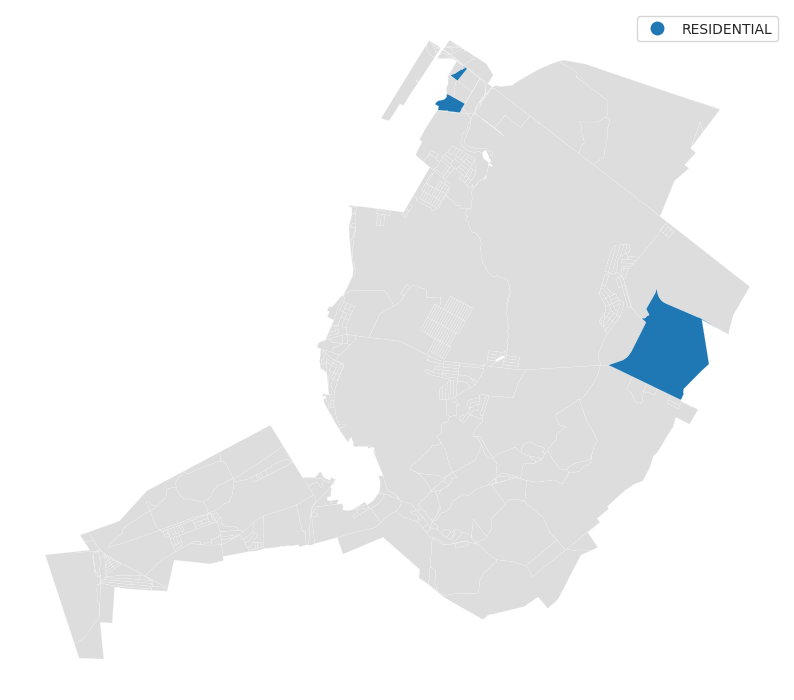

In [33]:
lup.plot(lu_blocks)

In [34]:
Villozi.update_land_use(lu_blocks) # добавление в модель типов землипользования

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Обеспеченность

In [35]:
from blocksnet import Provision, ProvisionMethod
service_type = 'school'
prov = Provision(city_model=Villozi)
prov_res = prov.calculate(service_type)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-12-14 11:00:34.969 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 94x3
2024-12-14 11:00:35.017 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-14 11:00:35.167 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-14 11:00:35.213 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


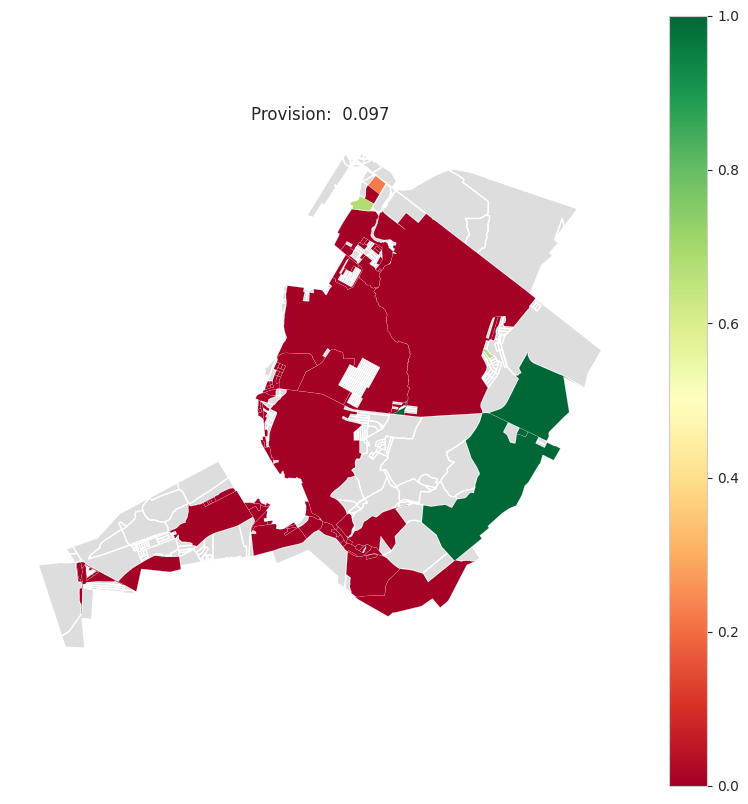

In [36]:
prov.plot(prov_res)

In [37]:
# prov_res.to_file('provision_gravity.geojson') # Сохранить обеспеченность

## Сохранение модели

In [38]:
Villozi.to_pickle('villozi_model.pickle')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
Villozi = City.from_pickle('villozi_model.pickle') # считываем в переменную готовую модель
print(Villozi)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CRS : EPSG:32636
Blocks : 505
Service types : 1/67
Buildings : 13360
Services : 4

